In [2]:
import pandas as pd

utilizamos **matplotlib** para realizar diversos gráficos que nos ayudan a entender mejor nuestros datos, pero tiene el inconveniente de que si ejecuto un gráfico, el anterior desaparece. Para solucionar esto se usa **matplotlib inline**

In [26]:
#matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

In [4]:
# el input de este paso es el output del anterior
vehiculos=pd.read_csv("vehiculos.1.procesado_inicial.csv")

In [10]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [19]:
vehiculos.shape

(36930, 12)

In [21]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985                   19
Chevrolet-C10 Pickup 2WD-1984                 16
GMC-S15 Pickup 2WD-1984                       16
Chevrolet-S10 Pickup 2WD-1984                 16
Ford-F150 Pickup 2WD-1984                     16
GMC-C15 Pickup 2WD-1984                       16
Chevrolet-C10 Pickup 2WD-1986                 14
GMC-C15 Pickup 2WD-1985                       14
Chevrolet-C10 Pickup 2WD-1985                 14
GMC-C15 Pickup 2WD-1986                       14
GMC-Vandura G15/25 2WD-1984                   14
Chevrolet-G10/20 Van 2WD-1985                 14
Ford-Ranger Pickup 2WD-1984                   14
Chevrolet-G10/20 Van 2WD-1984                 14
GMC-C15 Pickup 2WD-1988                       13
Ford-Escort-1985                              13
Ford-F150 Pickup 2WD-1985                     13
Chevrolet-G10/20 Van 2WD-1986                 13
Dodge-D100/D150 Pickup 2WD-1985               13
Chevrolet-S10 Pickup 2WD-1985                 13
GMC-G15/25 Vandura 2

In [20]:
vehiculos[vehiculos.duplicated()].shape

(0, 12)

In [12]:
vehiculos=vehiculos.drop_duplicates()

Jeep-Cherokee/Wagoneer-1985                24
Ford-F150 Pickup 2WD-1984                  19
GMC-C15 Pickup 2WD-1984                    19
Chevrolet-C10 Pickup 2WD-1984              19
Chevrolet-S10 Pickup 2WD-1984              18
GMC-C15 Pickup 2WD-1985                    18
GMC-S15 Pickup 2WD-1984                    18
Chevrolet-C10 Pickup 2WD-1985              18
GMC-C15 Pickup 2WD-1986                    17
Chevrolet-C10 Pickup 2WD-1986              17
Dodge-Ram 50 Pickup 2WD-1984               17
Mitsubishi-Truck 2WD-1984                  17
Ford-Ranger Pickup 2WD-1984                17
GMC-Vandura G15/25 2WD-1984                16
Ford-Escort-1984                           16
Chevrolet-G10/20 Van 2WD-1984              16
Ford-F150 Pickup 2WD-1985                  16
Mercury-Lynx-1984                          16
Ford-Escort-1985                           16
Volkswagen-Rabbit-1984                     16
Dodge-D100/D150 Pickup 2WD-1985            15
Ford-Bronco 4WD-1984              

son muchos los valores duplicados

In [22]:
vehiculos.shape

(36930, 12)

In [23]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

Front-Wheel Drive se repite un 36%, si ese vlor superara el 80-90% seria preocupante, ya que las demas no aportarian tanta
información como deseamos

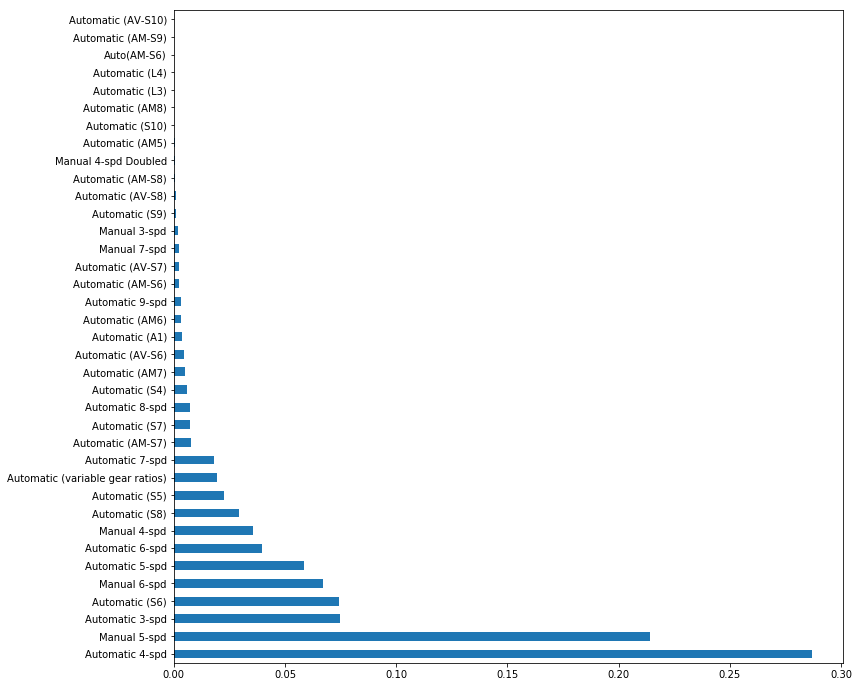

In [27]:
vehiculos.transmision.value_counts(normalize=True).plot.barh();

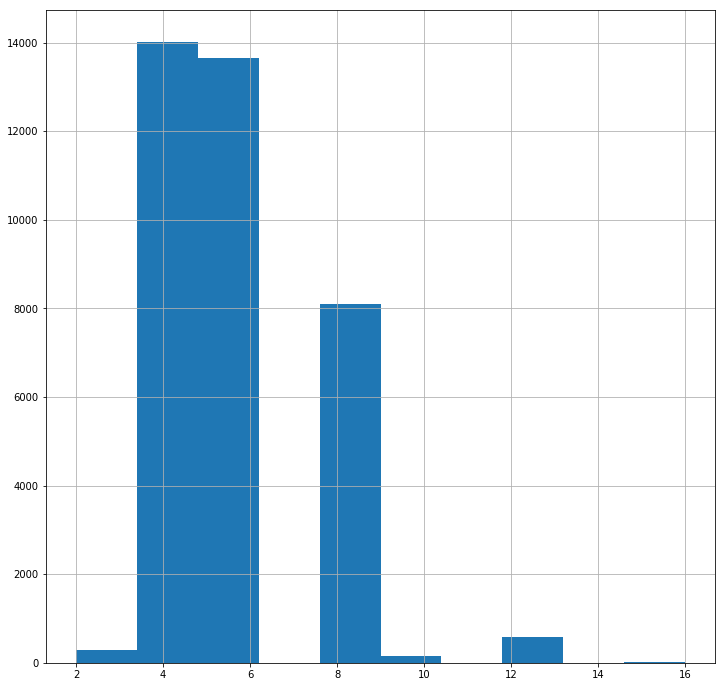

In [30]:
vehiculos.cilindros.hist();

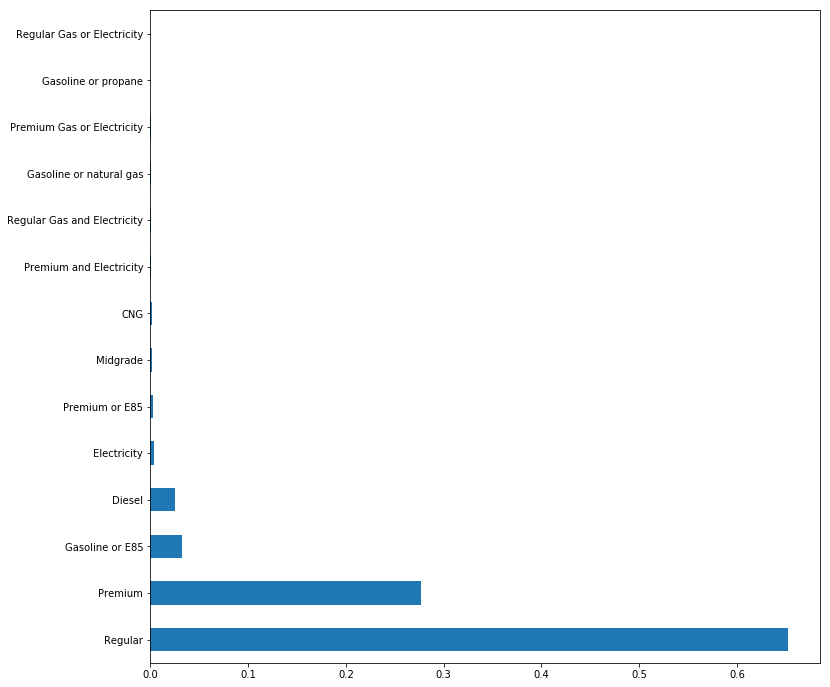

In [31]:
vehiculos.combustible.value_counts(normalize=True).plot.barh();

## Datos Missing

In [32]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64
modelo_unico | 0.0 | object




Vemos que campo traccion, cilindros y transmision tienen valores inexistentes. Sin embargo son cantidades despreciables (maximo es la variable traccion con un 3% inexistente)




Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

$ z=\frac{x-\mu}{\sigma}$

In [33]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


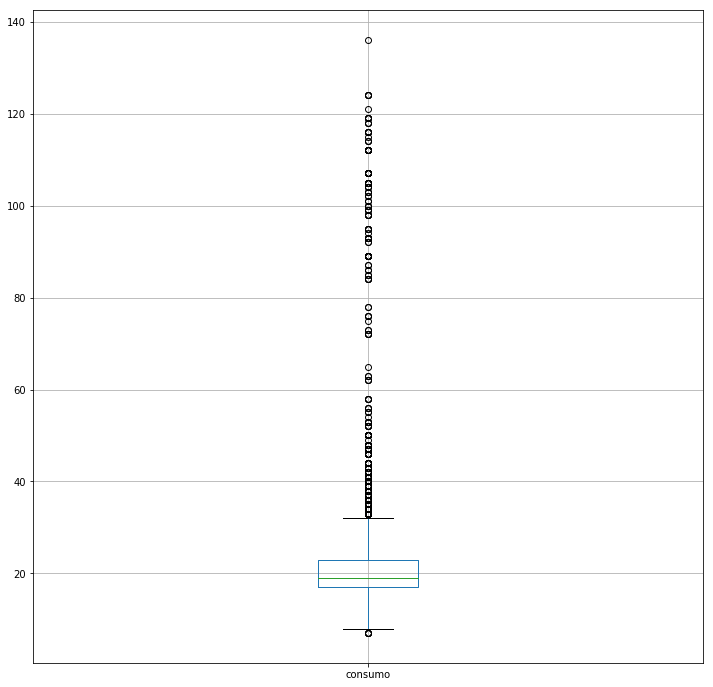

In [34]:
vehiculos.boxplot("consumo")

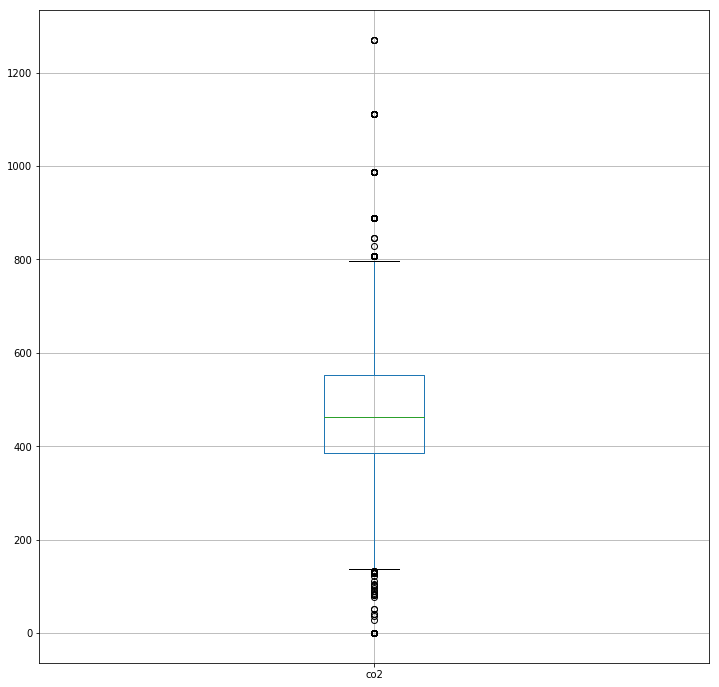

In [35]:
vehiculos.boxplot("co2")

hay autos que contminan mucho y otros contaminan 0, es posible?, vemos si tenemos vehiculos electricos

In [37]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [38]:
vehiculos_no_electricos = vehiculos[vehiculos.co2>0]



Ya que hemos descubierto esto, volvamos a revisar los datos con el nuevo dataset


In [39]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [ ]:
valores_duplicados_col(vehiculos_no_electricos)

In [ ]:
valores_inexistentes_col(vehiculos)



Ahora vemos que no hay valores inexistentes extremos en ninguna variable. La variable con mayor numero de valores inexistentes es traccion (2%). Obviamente, los coches electricos no tienen motor de gasolina y por tanto, no tienen cilindros



## Conclusion
* Hay 1506 records duplicados (los hemos removido)
* las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
* La variable combustible tiene una clase dominante (65% de coches tienen combustible Regular)
* hay un outlier en las variables co2 y consumo
* Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).



## Exportamos

In [41]:
vehiculos_no_electricos.to_csv("vehiculos.2.limpio_analisis.csv", index=False)